In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
working_directory =  r"/home/crest/z/hwang_Pro/data/2023_hokkaido_potato"

In [6]:
img_folder = os.path.join(working_directory, 'images')

Get image names and their paths

In [7]:
def build_file_dict(folder):
    file_dict = {}
    for foldername, subfolders, filenames in os.walk(folder):
        for filename in filenames:
            file_path = os.path.join(foldername, filename)
            file_dict[filename] = file_path
    return file_dict

In [8]:
img_dict = build_file_dict(img_folder)

In [9]:
img_dict

{'DSC_000_0065.jpg': '/home/crest/z/hwang_Pro/data/2023_hokkaido_potato/images/R1-1/000/DSC_000_0065.jpg',
 'DSC_000_0031.jpg': '/home/crest/z/hwang_Pro/data/2023_hokkaido_potato/images/R1-1/000/DSC_000_0031.jpg',
 'DSC_000_0029.jpg': '/home/crest/z/hwang_Pro/data/2023_hokkaido_potato/images/R1-1/000/DSC_000_0029.jpg',
 'DSC_000_0040.jpg': '/home/crest/z/hwang_Pro/data/2023_hokkaido_potato/images/R1-1/000/DSC_000_0040.jpg',
 'DSC_000_0001.jpg': '/home/crest/z/hwang_Pro/data/2023_hokkaido_potato/images/R1-1/000/DSC_000_0001.jpg',
 'DSC_000_0047.jpg': '/home/crest/z/hwang_Pro/data/2023_hokkaido_potato/images/R1-1/000/DSC_000_0047.jpg',
 'DSC_000_0010.jpg': '/home/crest/z/hwang_Pro/data/2023_hokkaido_potato/images/R1-1/000/DSC_000_0010.jpg',
 'DSC_000_0035.jpg': '/home/crest/z/hwang_Pro/data/2023_hokkaido_potato/images/R1-1/000/DSC_000_0035.jpg',
 'DSC_000_0037.jpg': '/home/crest/z/hwang_Pro/data/2023_hokkaido_potato/images/R1-1/000/DSC_000_0037.jpg',
 'DSC_000_0051.jpg': '/home/crest/z/h

In [10]:
import random

In [11]:
random_img = random.choice(list(img_dict.keys()))

show the picked img

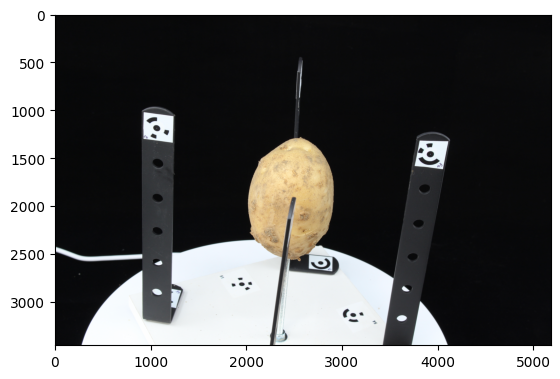

In [12]:
img_np = plt.imread(img_dict[random_img])
plt.imshow(img_np)

In [17]:
img_np.shape

(3456, 5184, 3)

# try Kmeans-cluster

In [13]:
from sklearn.cluster import KMeans

In [14]:
def kmeans_clustering(image, n_clusters):
    # Reshape the image to 2D array
    pixels = image.reshape(-1, 3)
  
    # Initialize K-means object
    kmeans = KMeans(n_clusters=n_clusters)
  
    # Perform clustering
    labels = kmeans.fit_predict(pixels)
  
    return labels

In [24]:
labels = kmeans_clustering(img_np, n_clusters=3)

/home/crest/Applications/miniconda3/envs/lab/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
img_lb = labels.reshape(img_np.shape[0], img_np.shape[1])
img_lb.shape

(3456, 5184)

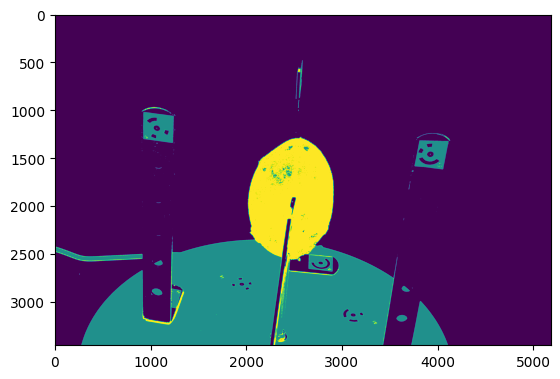

In [21]:
plt.imshow(img_lb)

In [22]:
np.unique(img_lb)

array([0, 1, 2], dtype=int32)

## Try simple threshold

In [25]:
from skimage import color

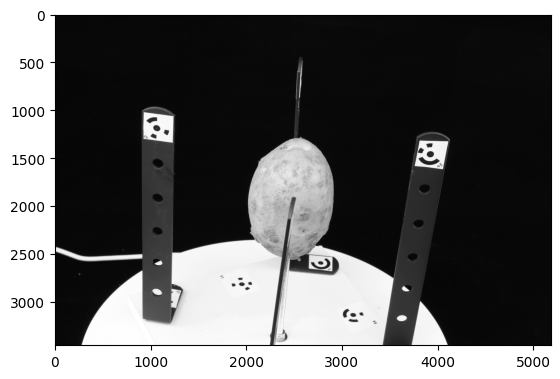

In [26]:
# conver to gray
gray_img = color.rgb2gray(img_np)

plt.imshow(gray_img, cmap='gray')

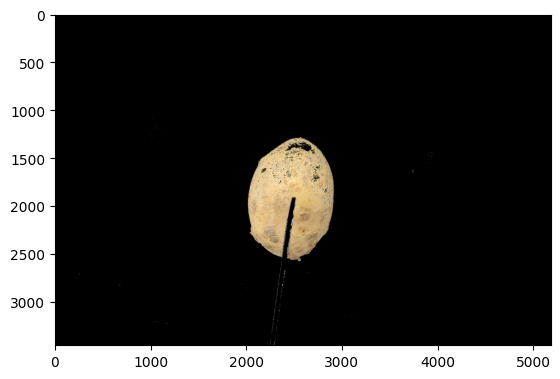

In [28]:
# convert to LAB color space
lab_image = color.rgb2lab(img_np)

# get color channel
a_channel = lab_image[:, :, 1]
b_channel = lab_image[:, :, 2]

# set channel threshold
yellow_lower = np.array([0, 0, 0])  # 黄色下限
yellow_upper = np.array([100, 127, 127])  # 黄色上限

# great mask
mask = np.logical_and(np.logical_and(a_channel > yellow_lower[1], a_channel < yellow_upper[1]),
                      np.logical_and(b_channel > yellow_lower[2], b_channel < yellow_upper[2]))

# apply mask to image
result = np.copy(img_np)
result[~mask] = 0

# visualize
plt.imshow(result)

In [29]:
from scipy import ndimage

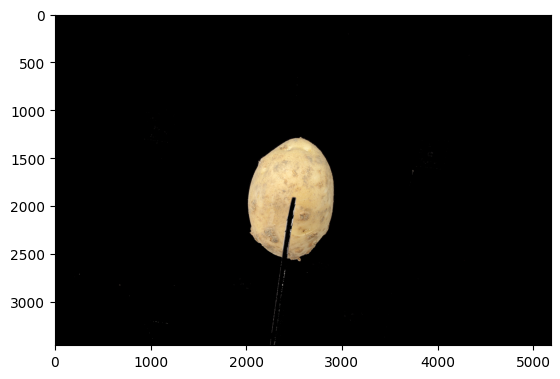

In [30]:
# fill holes in the mask
filled_mask = ndimage.binary_fill_holes(mask)


# apply to original image
result = np.copy(img_np)
result[~filled_mask] = 0

# 显示结果
plt.imshow(result)

In [34]:
def get_mask(img_path):
    img_np = plt.imread(img_path)

    # convert to LAB color space
    lab_image = color.rgb2lab(img_np)

    # get color channel
    a_channel = lab_image[:, :, 1]
    b_channel = lab_image[:, :, 2]

    # set channel threshold
    yellow_lower = np.array([0, 0, 0])  # 黄色下限
    yellow_upper = np.array([100, 127, 127])  # 黄色上限

    # great mask
    mask = np.logical_and(np.logical_and(a_channel > yellow_lower[1], a_channel < yellow_upper[1]),
                        np.logical_and(b_channel > yellow_lower[2], b_channel < yellow_upper[2]))

    # fill holes in the mask
    filled_mask = ndimage.binary_fill_holes(mask)


    # 将掩膜应用于原始图像
    result = np.copy(img_np)
    result[~filled_mask] = 0

    return filled_mask, img_np, result

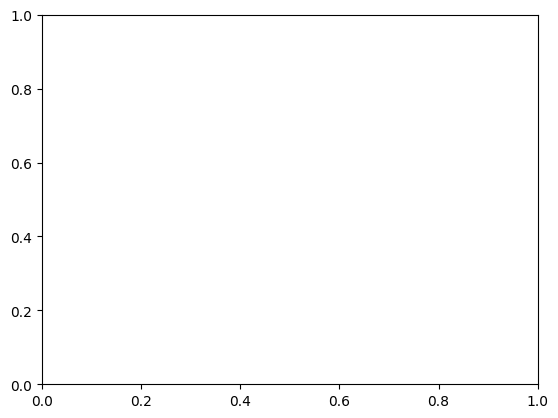

In [36]:
for i in range(1):
    img_list = list(img_dict.keys())
    random_img = random.choice(img_list)
    
    mask, img_np, result = get_mask(img_dict[random_img])

    plt.imshow(np.concatenate([img_np, result], axis=1))
    plt.tight_layout()
    plt.savefig(f'__pycache__/{random_img}_view.png')

    plt.clf()
    plt.cla()

    plt.imsave(f'__pycache__/{random_img}_mask.png', mask, cmap='gray')

but got problem if just remove yellow:

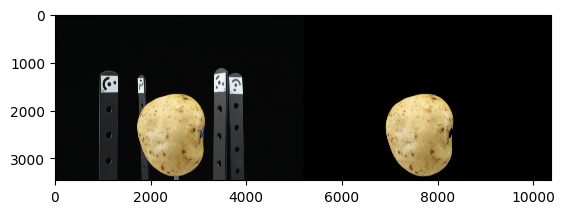

In [39]:
mask, img_np, result = get_mask(img_dict['DSC_000_3020.jpg'])


plt.imshow(np.concatenate([img_np, result], axis=1))

the blud pin also been removed

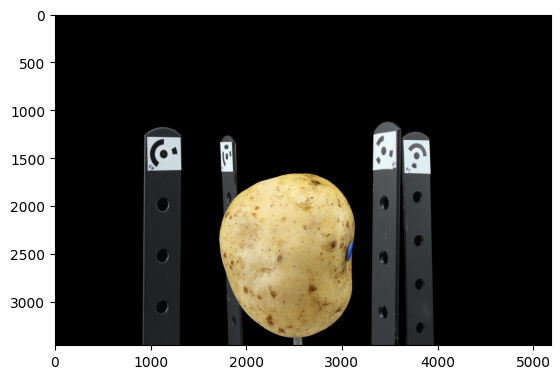

In [43]:
# convert to LAB color space
lab_image = color.rgb2lab(img_np)

# get L channel
l_channel = lab_image[:, :, 0]

# set threshold
black_threshold = 10  # 黑色阈值
white_threshold = 90  # 白色阈值

# great mask
mask = np.logical_and(l_channel > black_threshold, l_channel < white_threshold)

# fill holes in the mask
filled_mask = ndimage.binary_fill_holes(mask)

# apply mask to image
result = np.copy(img_np)
result[~filled_mask] = 0

# visualize
plt.imshow(result)

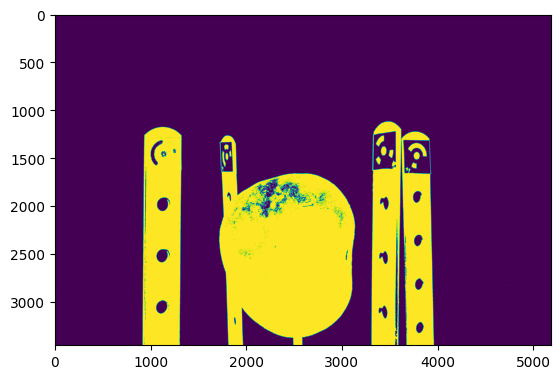

In [41]:
plt.imshow(mask)

remove black white gray

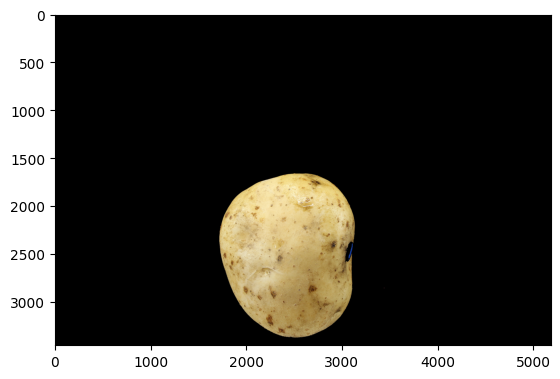

In [44]:
# convert to LAB color space
lab_image = color.rgb2lab(img_np)

# 提取 a 通道和 b 通道
a_channel = lab_image[:, :, 1]
b_channel = lab_image[:, :, 2]

# 设置阈值范围
color_threshold = 20  # 颜色阈值

# 创建掩膜
mask = np.logical_or(a_channel > color_threshold, b_channel > color_threshold)

# fill holes in the mask
filled_mask = ndimage.binary_fill_holes(mask)

# apply mask to image
result = np.copy(img_np)
result[~filled_mask] = 0

# visualize
plt.imshow(result)

In [45]:
def get_mask(img_path):
    img_np = plt.imread(img_path)

    # convert to LAB color space
    lab_image = color.rgb2lab(img_np)

    # get color channel
    a_channel = lab_image[:, :, 1]
    b_channel = lab_image[:, :, 2]

    # set channel threshold
    color_threshold = 20  # 颜色阈值

    # 创建掩膜
    mask = np.logical_or(a_channel > color_threshold, b_channel > color_threshold)

    # fill holes in the mask
    filled_mask = ndimage.binary_fill_holes(mask)


    # 将掩膜应用于原始图像
    result = np.copy(img_np)
    result[~filled_mask] = 0

    return filled_mask, img_np, result

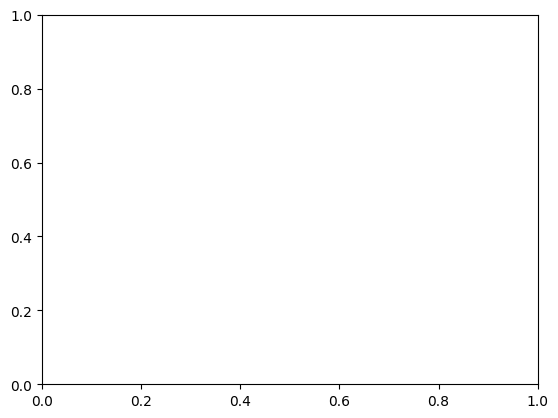

In [47]:
for i in range(1):
    img_list = list(img_dict.keys())
    random_img = random.choice(img_list)

    print(img_dict[random_img])
    
    mask, img_np, result = get_mask(img_dict[random_img])

    plt.imshow(np.concatenate([img_np, result], axis=1))
    plt.axis('off')
    plt.savefig(f'__pycache__/2_{random_img}_view.png', bbox_inches='tight')

    plt.clf()
    plt.cla()

    plt.imsave(f'__pycache__/2_{random_img}_mask.png', mask, cmap='gray')

In [48]:
img_dict[random_img]

'/home/crest/z/hwang_Pro/data/2023_hokkaido_potato/images/R2-8/001/DSC_001_1299.jpg'

In [ ]:
for i in range(10):
    img_list = list(img_dict.keys())
    random_img = random.choice(img_list)

    print(img_dict[random_img])
    
    mask, img_np, result = get_mask(img_dict[random_img])

    plt.imshow(np.concatenate([img_np, result], axis=1))
    plt.axis('off')
    plt.savefig(f'__pycache__/3_{random_img}_view.png', bbox_inches='tight')

    plt.clf()
    plt.cla()

    plt.imsave(f'__pycache__/3_{random_img}_mask.png', mask, cmap='gray')